Nico Hillison

Spring 2021

CS 251: Data Analysis and Visualization

Project 1: Data Analysis and Visualization

**Week 2: Start this after your 1st lab**

## Task 2) Update `Data` class for data selection

You will update `Data` to allow the user to select one or more data variables based on their string name. This will give you some practice working with numpy basics.

Implement the following methods in `Data`:
- `get_all_data()`
- `head()`: Return the 1st five data samples (all variables)
- `tail()`: Return the last five data samples (all variables)
- `limit_samples(self, start_row, end_row)`: Update the data so that the object only stores the samples in the contiguous range `[start_row, end_row)`.
- `select_data(headers, rows=[])`: Return data samples corresponding to the variable names in `headers`. If `rows` is empty, return all samples, otherwise return samples at the indices specified by the `rows` list.

In [1]:
from data import Data
import numpy as np

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 2a) Test `get_all_data`

In [2]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
dat = iris_data.get_all_data()
dat[0,:] = -9999
new_dat = iris_data.get_all_data()
if new_dat[0, 0] == -9999.:
    print('!!You did not return a copy of your data!!\n')
else:
    print('get_all_data seems ok!')

get_all_data seems ok!


### 2b) Test `head` and `tail`

#### (i) Iris

In [3]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
print(f'Your Iris head (shape={iris_data.head().shape}) is:\n{iris_data.head()}')
print(f'Your Iris tail (shape={iris_data.head().shape}) is:\n{iris_data.tail()}')

Your Iris head (shape=(5, 4)) is:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Your Iris tail (shape=(5, 4)) is:
[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


You should see:

    Your Iris head (shape=(5, 4)) is:
    [[5.1 3.5 1.4 0.2]
     [4.9 3.  1.4 0.2]
     [4.7 3.2 1.3 0.2]
     [4.6 3.1 1.5 0.2]
     [5.  3.6 1.4 0.2]]
    Your Iris tail (shape=(5, 4)) is:
    [[6.7 3.  5.2 2.3]
     [6.3 2.5 5.  1.9]
     [6.5 3.  5.2 2. ]
     [6.2 3.4 5.4 2.3]
     [5.9 3.  5.1 1.8]]

#### (ii) Data with small number of samples

In [4]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)
print(f'Your test head (shape={test_data.head().shape}) is:\n{test_data.head()}')
print(f'Your test tail (shape={test_data.head().shape}) is:\n{test_data.tail()}')

Your test head (shape=(3, 4)) is:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
Your test tail (shape=(3, 4)) is:
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


You should see:

    Your test head (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]
    Your test tail (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]

### 2c) Test `limit_samples`

In [5]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_data.limit_samples(50, 100)
print(f'After limiting samples, your test head is:\n{iris_data.head()}')
print(f'After limiting samples, your test tail is:\n{iris_data.tail()}')

After limiting samples, your test head is:
[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]
After limiting samples, your test tail is:
[[5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [5.1 2.5 3.  1.1]
 [5.7 2.8 4.1 1.3]]


You should see:

    After limiting samples, your test head is:
    [[7.  3.2 4.7 1.4]
     [6.4 3.2 4.5 1.5]
     [6.9 3.1 4.9 1.5]
     [5.5 2.3 4.  1.3]
     [6.5 2.8 4.6 1.5]]
    After limiting samples, your test tail is:
    [[5.7 3.  4.2 1.2]
     [5.7 2.9 4.2 1.3]
     [6.2 2.9 4.3 1.3]
     [5.1 2.5 3.  1.1]
     [5.7 2.8 4.1 1.3]]

### 2d) Test `select_data`

#### (i) Test data with spaces

In [6]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

one = test_data.select_data(['spaces'])
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'])
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

All data in the "spaces" variable (shape=(3, 1)): 
[[ 2.]
 [ 6.]
 [10.]]
All data in the "spaces" and "places" variables (shape=(3, 2)): 
[[ 2.  4.]
 [ 6.  8.]
 [10. 12.]]


You should see:

    All data in the "spaces" variable (shape=(3, 1)): 
    [[ 2.]
     [ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(3, 2)): 
    [[ 2.  4.]
     [ 6.  8.]
     [10. 12.]]

#### (ii) Test data with spaces, some samples

In [7]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [1, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'], rows=rows)
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

All data in the "spaces" variable (shape=(2, 1)): 
[[ 6.]
 [10.]]
All data in the "spaces" and "places" variables (shape=(2, 2)): 
[[ 6.  8.]
 [10. 12.]]


You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(2, 2)): 
    [[ 6.  8.]
     [10. 12.]]

## Task 3) `Analysis` class

In this task, you will implement the `Analysis` class that analyzes and visualizes complex datasets comprised of many variables. After creating `Analysis`, you’ll use it alongside your `Data` class to analyze an open-access scientific dataset. *Can you use the tools you’ve developed to extract real-world truths from data?*

You will build on this object-oriented approach to do advanced data analysis in future projects, making it easier for you to apply the tools you develop this week to a wide range of datasets.

It is crucial for your success in CS251 to become fluent in the **vectorization** of matrix operations (**NO LOOPS**) with Numpy and the visualization of data with Matplotlib. We will use these Python packages each and every week. Please bring your questions to class and office hours so that we can help you get comfortable with these essential tools before the math gets more complex and interesting.

**We will take off -0.5 points for every loop that we see — vectorized computations only in analysis functions!**

**TODO:**
- Download the `analysis.py` code template.

### Analysis and summary statistic methods

To actually perform computations on data, you will implement the following methods in `analysis.py`, modeled off of common functions in the `pandas` python package (https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html) that we will adopt later in the semester:

- `set_data(data)`
- `min(headers, rows=[])`: Computes the minimum of each variable in `headers` in the data object. Possibly only in a subset of data samples (`rows`) if `rows` is not empty.
- `max(headers, rows=[])`: Computes the maximum of each variable in `headers` in the data object.
- `range(headers, rows=[])`: Computes the range [min, max] for each variable in `headers` in the data object.
- `mean(headers, rows=[])`: Computes the mean for each variable in `headers` in the data object. Equation for mean: $$\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$ where $x_i$ is the $i^{th}$ data sample and $N$ is the total number of data samples in the dataset.
- `var(headers, rows=[])`: Computes the variance for each variable in `headers` in the data object. Equation for sample variance: $$s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.
- `std(headers, rows=[])`: Computes the standard deviation for each variable in `headers` in the data object. Equation for sample standard deviation: $$s^2 = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2}$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.

In [8]:
from analysis import Analysis

iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
an = Analysis(iris_data)

#### (i) Test `min`

In [9]:
print(f"Your minimum values for length vars (all samples) are\n{an.min(['sepal_length', 'petal_length'])}\nand should be\n[4.3 1. ]")
print(f"Your minimum values for length vars (1st 10 samples) are\n{an.min(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.4 1.3]")
print(f"Your shape is {an.min(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

Your minimum values for length vars (all samples) are
[4.3 1. ]
and should be
[4.3 1. ]
Your minimum values for length vars (1st 10 samples) are
[4.4 1.3]
and should be
[4.4 1.3]
Your shape is (2,)
and should be (2,)


#### (ii) Test `range`

In [10]:
all_mins, all_maxs = an.range(['sepal_length', 'sepal_width'])
some_mins, some_maxs = an.range(['sepal_length', 'sepal_width'], rows=np.arange(10))
print(f"Your range for sepal vars (all samples) is\nmins:{all_mins}\nmaxs:{all_maxs}\nand should be\nmins:[4.3 2. ]\nmaxs:[7.9 4.4]\n")
print(f"Your range for sepal vars (1st 10 samples) is\nmins:{some_mins}\nmaxs:{some_maxs}\nand should be\nmins:[4.4 2.9]\nmaxs:[5.4 3.9]\n")
print(f"Your min shape is {all_mins.shape}\nand should be (2,)")
print(f"Your max shape is {all_maxs.shape}\nand should be (2,)")

Your range for sepal vars (all samples) is
mins:[4.3 2. ]
maxs:[7.9 4.4]
and should be
mins:[4.3 2. ]
maxs:[7.9 4.4]

Your range for sepal vars (1st 10 samples) is
mins:[4.4 2.9]
maxs:[5.4 3.9]
and should be
mins:[4.4 2.9]
maxs:[5.4 3.9]

Your min shape is (2,)
and should be (2,)
Your max shape is (2,)
and should be (2,)


#### (iii) Test `mean`

In [11]:
print(f"Your mean values for length vars (all samples) are\n{an.mean(['sepal_length', 'petal_length'])}\nand should be\n[5.84333333 3.758     ]")
print(f"Your mean values for length vars (1st 10 samples) are\n{an.mean(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.86 1.45]")
print(f"Your shape is {an.mean(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

Your mean values for length vars (all samples) are
[5.84333333 3.758     ]
and should be
[5.84333333 3.758     ]
Your mean values for length vars (1st 10 samples) are
[4.86 1.45]
and should be
[4.86 1.45]
Your shape is (2,)
and should be (2,)


#### (iv) Test `var`

In [12]:
print(f"Your variance values for all vars (all samples) are\n{an.var(an.data.get_headers())}\nand should be\n[0.68569351 0.18997942 3.11627785 0.58100626]")
print(f"Your variance values for all vars (1st 10 samples) are\n{an.var(an.data.get_headers(), rows=np.arange(10))}\nand should be\n[0.08488889 0.09433333 0.01166667 0.00622222]")

Your variance values for all vars (all samples) are
[0.68569351 0.18997942 3.11627785 0.58100626]
and should be
[0.68569351 0.18997942 3.11627785 0.58100626]
Your variance values for all vars (1st 10 samples) are
[0.08488889 0.09433333 0.01166667 0.00622222]
and should be
[0.08488889 0.09433333 0.01166667 0.00622222]


#### (v) Test `std`

In [13]:
print(f"Your stdev values for all vars (all samples) are\n{an.std(an.data.get_headers())}\nand should be\n[0.82806613 0.43586628 1.76529823 0.76223767]")
print(f"Your stdev values for all vars (1st 10 samples) are\n{an.std(an.data.get_headers(), rows=np.arange(10))}\nand should be\n[0.29135698 0.30713732 0.10801234 0.07888106]")

Your stdev values for all vars (all samples) are
[0.82806613 0.43586628 1.76529823 0.76223767]
and should be
[0.82806613 0.43586628 1.76529823 0.76223767]
Your stdev values for all vars (1st 10 samples) are
[0.29135698 0.30713732 0.10801234 0.07888106]
and should be
[0.29135698 0.30713732 0.10801234 0.07888106]


## Task 4) Data visualization with matplotlib

In this task, you will create some plots to practice using matplotlib. You will write several functions to make some kinds of plots that will come up frequently in the coming weeks.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

### 4a) Join data with a smooth curve

In the cell below, create a single plot of the functions $x$, $x^2$, and $x^3$ in different colors in the range [-5, 5]. Points should be connected with a smooth curve in each case.

Your plots should be "high quality", which means that they should contain:
- a helpful title
- clearly differentiated curve colors. **Do not use the default colors, pick your own colors.**
- a legend showing which color scales map onto which curves
- only the x tick marks -5, 0, +5
- only the y tick marks -100, 0, +100
- there should be no garbage text output below, just the plot

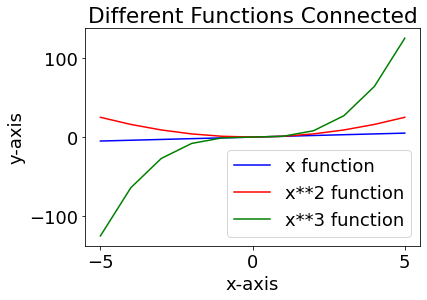

In [15]:
plt.title('Different Functions Connected')
x = np.arange(-5, 6)
#plotting the finctions
plt.plot(x, x, 'b-', label = 'x function')
plt.plot(x, x**2, 'r-', label = 'x**2 function')
plt.plot(x, x**3, 'g-', label = 'x**3 function')
#includes specific labels of which line is which
plt.legend()
plt.ylabel('y-axis') #name axis
plt.xlabel('x-axis') #name axis
#making the graph bigger
plt.rcParams['figure.figsize'] = [15,10]
#specifying the ranges from the x and y axis
plt.xticks([-5, 0, 5])
plt.yticks([-100, 0, 100])
plt.show()


### 4b) Anscombe's Quartet: Create a 2x2 grid of plots 

In the cell below, create a SINGLE figure with four *scatter plots* in it (2 rows, 2 columns). This should leverage matplotlib's `subplots` function and create ONE cell output (not 4).

1. You are plotting the data in `anscombe.csv`: The first set of points should be plotted on the top-left (row indices 0-10), the second set should be on the top-right (row indices 11-21), the third set should be on the bottom-left (row indices 22-32), and the last set on the bottom-right (row indices 33-43).
2. Make the markers in each subplot a different shape for fun.
3. You should not have connected curves in these plots.
4. The x/y plot limits should the same in all plots (and include all data samples).

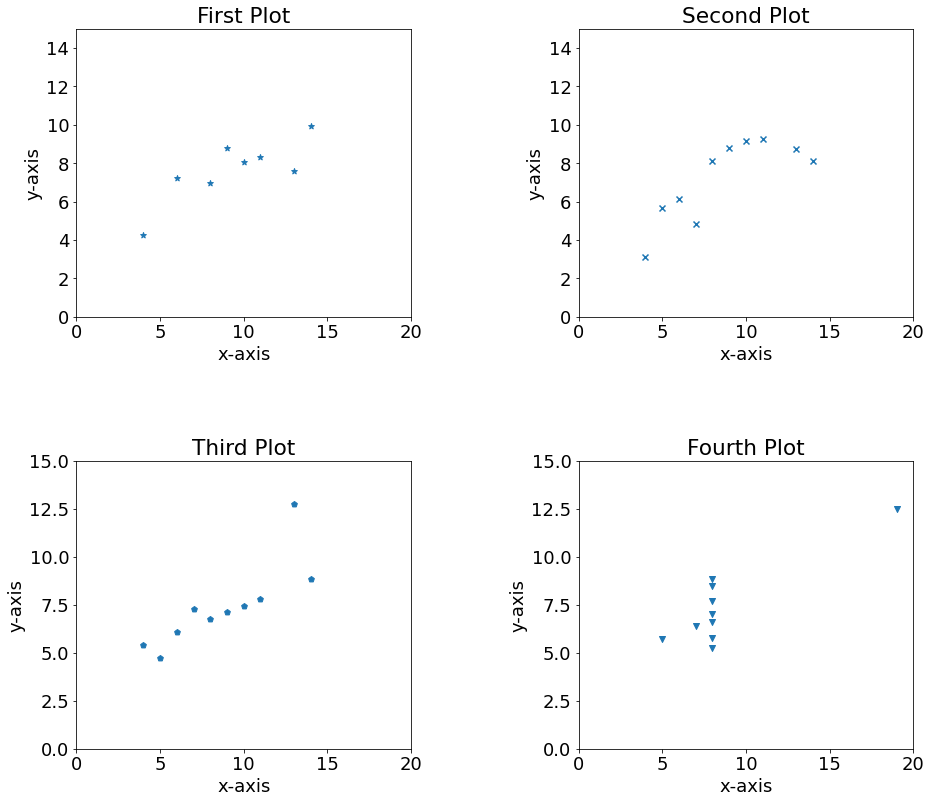

In [16]:
#import the data
anscombe_data = np.genfromtxt('data/anscombe.csv', delimiter = ',')
#creates 4 subplots: 2 rows and 2 cols
fig, axes = plt.subplots(2,2)
#first subplot on the top-left (row indices 0-10)
axes[0,0].scatter(anscombe_data[0:10,1], anscombe_data[0:10, 2], marker = '*')
#naming the axis'
axes[0,0].set_xlabel('x-axis')
axes[0,0].set_ylabel('y-axis')
#plot limits
axes[0,0].set_xlim([0,20])
axes[0,0].set_ylim([0,15])
#second subplot on the top-right (row indices 11-21)
axes[0,1].scatter(anscombe_data[11:21,1], anscombe_data[11:21, 2], marker = 'x')
#naming the axis'
axes[0,1].set_xlabel('x-axis')
axes[0,1].set_ylabel('y-axis')
#plot limits
axes[0,1].set_xlim([0,20])
axes[0,1].set_ylim([0,15])
#third subplot on the top-right (row indices 22-32)
axes[1,0].scatter(anscombe_data[22:32,1], anscombe_data[22:32, 2], marker = 'p')
#naming the axis'
axes[1,0].set_xlabel('x-axis')
axes[1,0].set_ylabel('y-axis')
#plot limits
axes[1,0].set_xlim([0,20])
axes[1,0].set_ylim([0,15])
#fourth subplot on the top-right (row indices 33-43)
axes[1,1].scatter(anscombe_data[33:43,1], anscombe_data[33:43, 2], marker = 'v')
#naming the axis'
axes[1,1].set_xlabel('x-axis')
axes[1,1].set_ylabel('y-axis')
#plot limits
axes[1,1].set_xlim([0,20])
axes[1,1].set_ylim([0,15])
#adding titles to the subplots
axes[0,0].title.set_text('First Plot')
axes[0,1].title.set_text('Second Plot')
axes[1,0].title.set_text('Third Plot')
axes[1,1].title.set_text('Fourth Plot')
#adding space between subplots
fig.subplots_adjust(left=None, bottom= 0, right=None, top=1, wspace=.5, hspace=.5)

plt.show()


### 4c) `scatter` method in `Analysis`

Scatter plots will come up a lot in this course. Fill in the `scatter` method in the `Analysis` class to automate the process of selecting (x, y) data from a dataset, creating a scatter plot, and labeling it with a title.

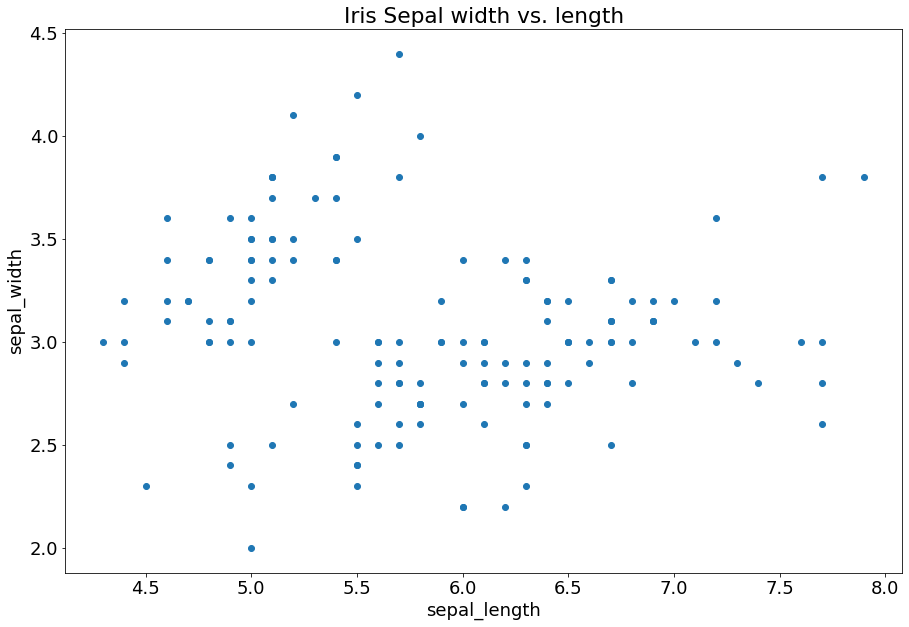

Your x sample shape is (150,) and should be (150,)
Your y sample shape is (150,) and should be (150,)


In [17]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_an = Analysis(iris_data)

x_samps, y_samps = iris_an.scatter('sepal_length', 'sepal_width', 'Iris Sepal width vs. length')
iris_an.show()

print(f'Your x sample shape is {x_samps.shape} and should be (150,)')
print(f'Your y sample shape is {y_samps.shape} and should be (150,)')

### 4d) `pair_plot` method in `Analysis`

When doing exploratory data analysis, it is often helpful to create scatter plots of all pairs of variables to visually discover relationships and develop hypotheses to explore quantitatively. For example, if we have variables A, B, C, we would create scatter plots (x=A, y=B), (x=A, y=C), (x=B, y=C). A grid of subplots showing all these scatter plots is called a **pair plot**. If there are $M$ variables, then the grid of plots is $M\times M$.

- In `Analysis`, implement `pair_plot` and test your implementation below on the Iris data.
    - The y axis of the first column should be labeled with the appropriate variable being plotted there.
    - The x axis of the last row should be labeled with the appropriate variable being plotted there.
    - There should be no other axis or tick labels (looks too cluttered!)

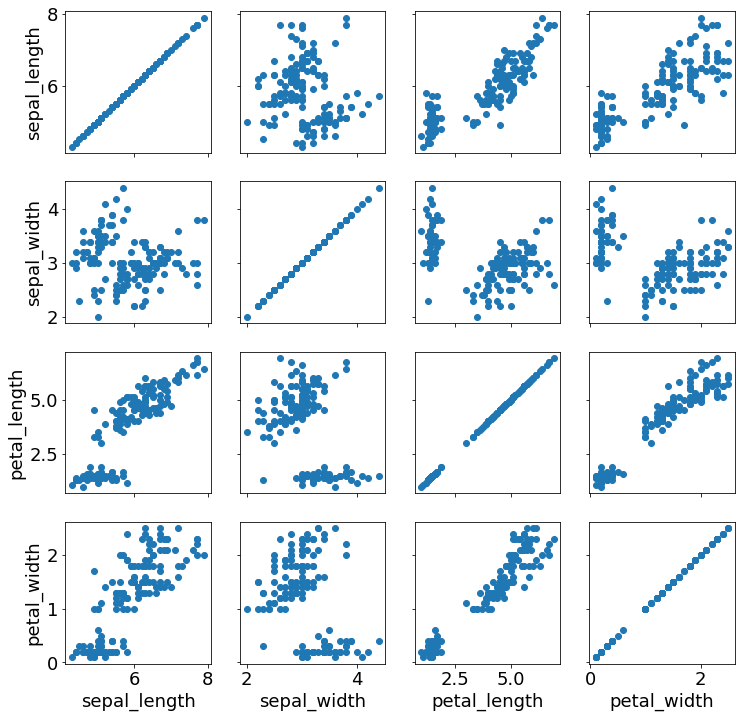

Do you have a 4x4 grid of plots? True


In [18]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_an = Analysis(iris_data)

fig, axes = iris_an.pair_plot(iris_data.get_headers())
iris_an.show()

print(f'Do you have a 4x4 grid of plots? {axes.shape[0] == 4 and axes.shape[1] == 4}')

## Task 5) Real-world application

Analyze one real-world dataset of your choice: [e.g. wine quality dataset, Old Faithful geyser dataset, Auto MPG dataset, tips dataset]. Use your **existing** visualization and analysis tools to try to learn something about the real world from this dataset (*you can implement other analyses and explore other visualizations as extensions; see below*). 

- Use scatter plot, pair plot, or other visualizations determine which helps you learn the most about your dataset.
    - Create at least one "good" graph that presents the data in a helpful way and at least one “bad” graph that is not helpful for gleaning insight into your dataset.
- Briefly (but completely) explain your findings in the Markdown cell below alongside well-labeled graphs that support your conclusions. Explain each variable (its units, its range, mean, stdev, what it means about the world).

NameError: name 'wine_data' is not defined

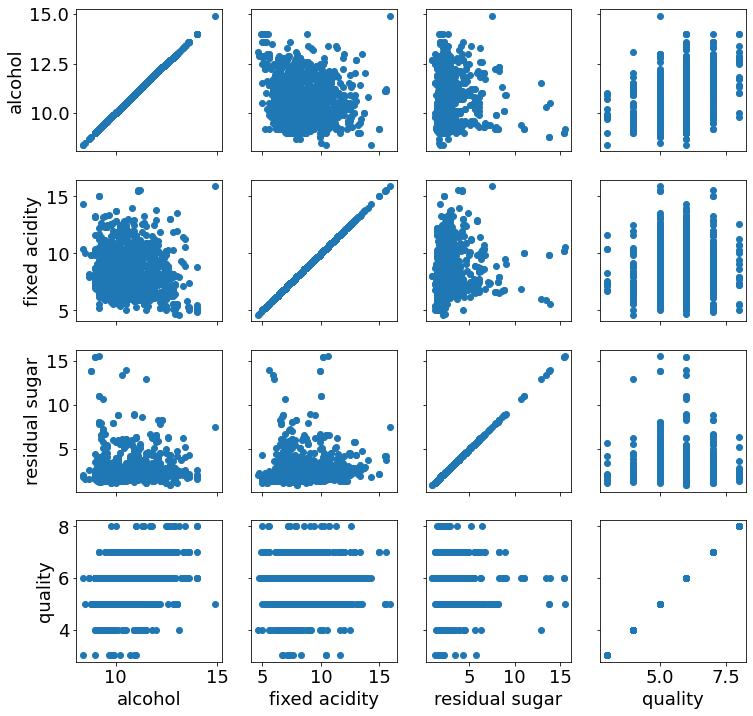

In [20]:
# Code to import your dataset and create visualizations here
wine_filename = 'data/red_wine.csv'
wine_data = Data(wine_filename)
wine_an = Analysis(wine_data)

view_headers = ['alcohol', 'fixed acidity', 'residual sugar', 'quality']
fig, axes = wine_an.pair_plot(view_headers)
wine_an.show()





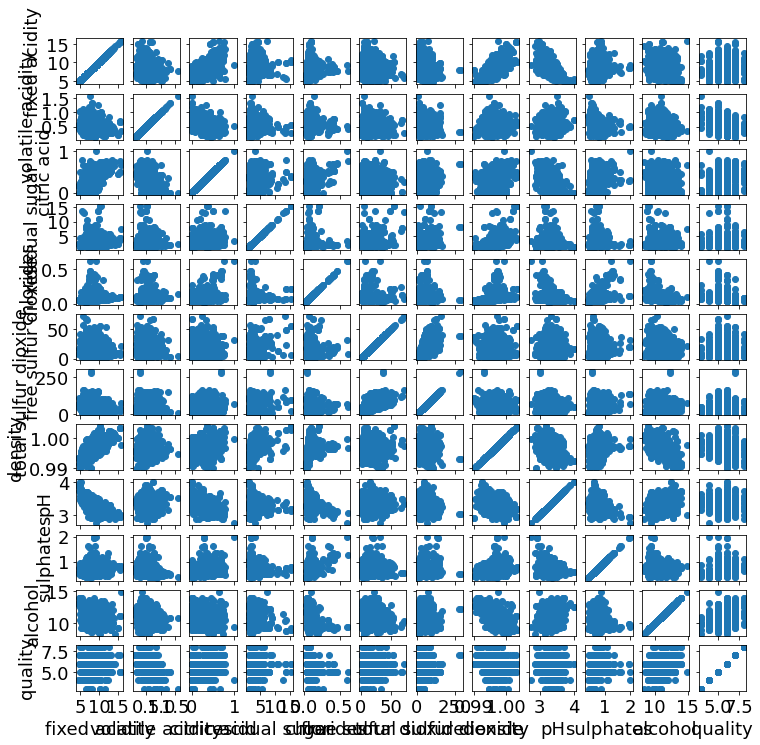

In [24]:
# Code to import your dataset and create visualizations here
# wine_filename = 'data/red_wine.csv'
# wine_data = Data(wine_filename)b
# wine_an = Analysis(wine_data)

fig, axes = wine_an.pair_plot(wine_data.get_headers())
wine_an.show()

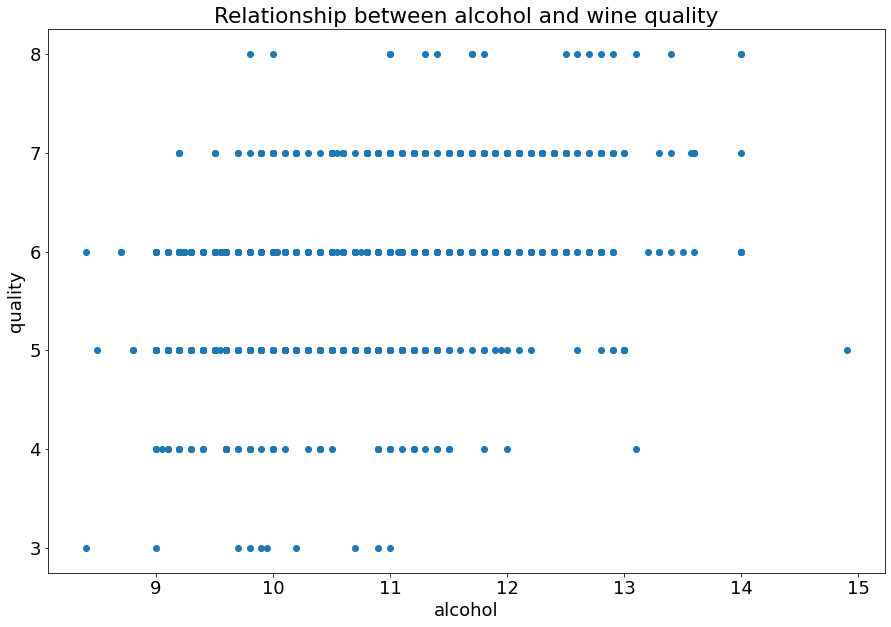

In [22]:
view_headers = ['alcohol', 'fixed acidity', 'residual sugar', 'quality']
fig, axes = wine_an.scatter('alcohol', 'quality', 'Relationship between alcohol and wine quality')
wine_an.show()


In [23]:
w_mins, w_maxs = wine_an.range(['alcohol', 'quality'])
w_means = wine_an.mean(['alcohol', 'quality'])
print(w_mins, w_maxs)
print(w_means)

[8.4 3. ] [14.9  8. ]
[10.42298311  5.63602251]


**Explain your findings here:**

After several looks and different data sets downloaded, I analysed data about red wine. The first plot is a sample of the dataset. It consists of a shape of (4,4), and of 4 different headers compared with each other (personally picked headers), just like what was done for the dataset of iris.csv. Afterwards, I made a plot of the wine data but taking in all the headers. This consisted of a shape of (12,12). As you can see, this is a bad example to know any insights about the dataset and clearly very unuseful. Lastly, I made a plot which shows specific data in the dataset in a helpful and insightful manner. I decided to compare the relationship between alcohol (independent variable) and wine quality (dependent variable). This showed that there are different red wines with the same amount of alcohol that are higher in quality as well as lower. Looking at the graph made me realize that I believe that only because red wine could have more alcohol, does not mean it makes it better. I also calculated the mins, maxs as well as the mean. It was very interesting, the min for red wine with alcohol was an 8.4 and was calculated to have a 3 as for quality. while the max for red wine was a 14.9 amount of alcohol and an 8 as for quality. The mean showed to be a total of 10.423 for alcohol and a 5.636 as for quality. It made me believe that the quality of wine in this data set, is very average. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1) More visualizations

Research and create more visualizations of data. If we haven't talked about it in class, all the better! This could be in the matplotlib API or something you build yourself (probably a better extension).

### 2) More summary statistics

Research, implement, and apply additional ways to quantitatively summarize a dataset. Compare these other techniques with those that you implemented in this project.

### 3) More datasets

Analyze and visualize additional datasets. Document and report on insights/hypothesized relationships that you may have discovered.

### 4) Anscombe's Quartet

Despite the visual dissimilarity of the data samples in each group of points, the groups of data have many identical (or nearly identical) summary statistics! Use you analysis code to verify this. Explain what it means / why it happens. Research additional statistics that are identical in the quartet, then implement and verify their similarity.  

### 5) Additional data types

You wrote `Data` to only store numeric data types. Extend your `Data` class to corectly parse and represent dates, strings, enums, and other types of data.

NOTE: You will definitely want to make a copy of your `Data` class before attempting this!

In [ ]:
print(cars_data.get_headers())

In [ ]:
# Code to import your dataset and create visualizations here
cars_filename = 'data/cars.csv'
cars_data = Data(cars_filename)
cars_an = Analysis(cars_data)

view_headers = ['MPG', 'Horsepower', 'Acceleration']
fig, axes = cars_an.pair_plot(view_headers)
cars_an.show()

In [ ]:
#data with all of the headers, bad one to analyze
fig, axes = cars_an.pair_plot(cars_data.get_headers())
cars_an.show()

In [ ]:
#specific data plot, good one to visualize and analyze
view_headers = ['Acceleration', 'Horsepower', 'Model', 'Weight']
fig, axes = cars_an.scatter('Acceleration', 'Weight', 'Relationship between acceleration and weight of a car')
cars_an.show()

In [ ]:

c_mins, c_maxs = cars_an.range(['Acceleration', 'Weight'])
c_means = cars_an.mean(['Acceleration', 'Weight'])
print(c_mins, c_maxs)
print(c_means)

Analysis

I decided that for my extension, I would grab another dataset. This time, the dataset is about cars. My first plot consists of a sample from the dataset with a shape of (3,3). Though there is a lot of different variables coming into consideration, this is not the best to analyze because the plots are too small and cluttered together. My second plot was with all the headers in the dataset of cars. This consisted of a shape of (7,7). This is a bad example to analyze data from because honestly, its very hard to read and cannot really make anything out of it. Lastly, I made a plot that I specifically chose to compare two headers with each other. This plot is a lit easier to read, one can see every data point seperately, and personally it is easier to understand what is going on. Afterwards, I also got the mins, maxes, and means of the data between acceleration and weight. With the scatterplot, what you are able to get out of the data between acceleration and weight is that: mostly, the less a car weights the faster its acceleration would be. 